In [1]:
import os, yaml, sys
import numpy as np
import torch
import h5py
from torchvision import models
from scipy.spatial.distance import squareform
import timm
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import create_RDM, get_device, decode_matlab_strings
device = get_device()

15:59:40 - device being used: mps


In [2]:
monkey_name = "paul"
date = "230204"
allimgs_path = f"{paths['livingstone_lab']}/tiziano/data/{monkey_name}_allimages{date}.mat"
rasters_path = f"{paths['livingstone_lab']}/tiziano/data/{monkey_name}_natraster{date}.mat"
with h5py.File(allimgs_path, "r") as f:
    try:
        refs = f["allimages"][:]      # shape (N, 1) of object refs
    except KeyError:
        refs = f["uniqueImage"][:]
    # end try
    image_names = decode_matlab_strings(f, refs)
    image_names = list(dict.fromkeys(image_names)) 
# from scipy.io import loadmat
# loadmat(allimgs_path)

In [3]:
with h5py.File(rasters_path, "r") as f:
    rasters = f["natraster"][:]      
rasters = rasters.transpose(2, 1, 0)
print(rasters.shape) # channels, time, trials

(383, 400, 4377)


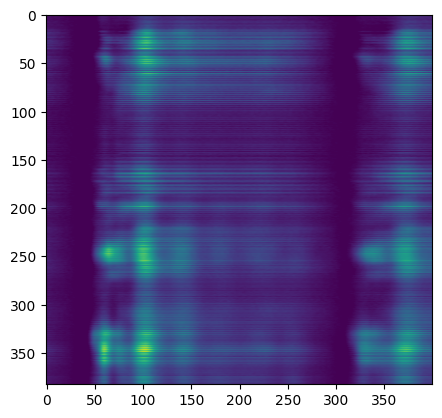

In [15]:
plt.imshow(np.mean(rasters, 2))
plt.clim([0, 1])

In [6]:
RDMs_list =[]
for i_time in range(rasters.shape[1]):
    RDMs_list.append(create_RDM(rasters[:40, i_time, :]))

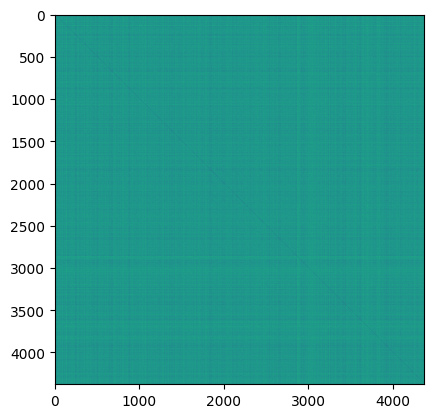

In [ ]:
from IPython.display import clear_output

for i in range(0, 400, 20):#len(RDMs_list)):
    plt.imshow(squareform(RDMs_list[i]))
    plt.pause(0.001)
    plt.close() 
    clear_output(wait=True)